# *RESUME PARSER PROJECT*

A Resume Parser is a valuable tool for HR professionals and organizations looking to streamline their recruitment process. It automates the extraction of key information from resumes, making it easier to manage and analyze candidate data. These are helpful in shortlisting candidates based on certain criteria without the hectic task of going through each Resume manually and evaluating it.

By ADITYA KUMAR 

## IMPORTING NECESSARY LIBRARIES 

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

## LOADING OUR DATASET

In [100]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [101]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [102]:
df.shape

(962, 2)

### Display the concise summary of dataframe

In [103]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


### Display the summary statistics

In [104]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


# Exploring Categories

In [105]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [106]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

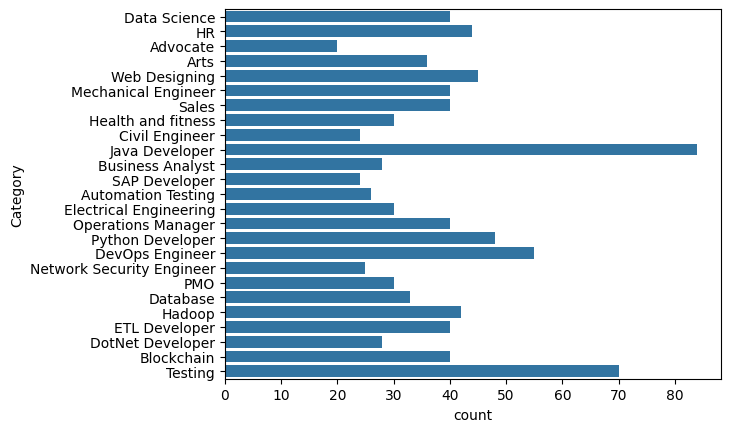

In [107]:
sns.countplot(df['Category'])

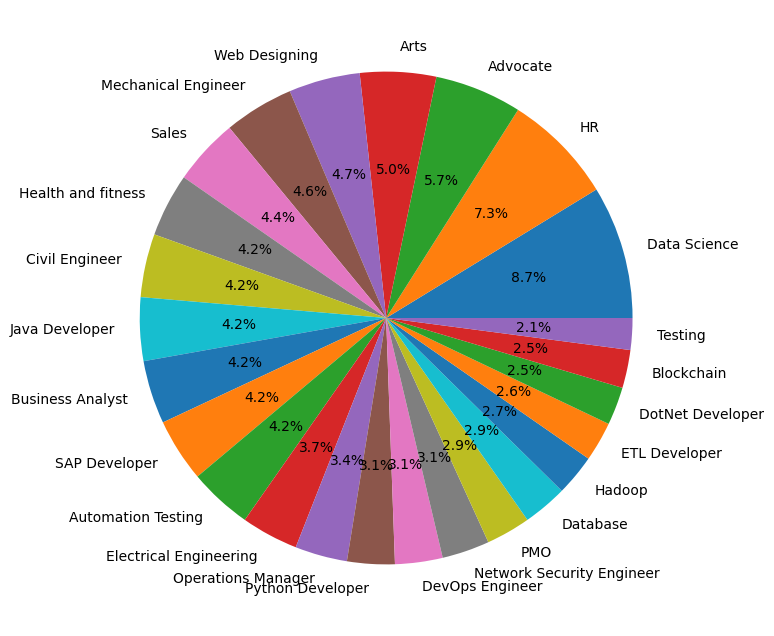

In [108]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(12,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')#, shadow =True, colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

## Exploring Resume

In [109]:
df['Category'][0]

'Data Science'

In [110]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# DATA CLEANING & PREPROCESSING

In [111]:
import re

def cleanResume(txt):
    # Remove URLs starting with 'http' or 'https'
    cleanText = re.sub(r'http\S+|https\S+', ' ', txt)

    # Remove '@' symbols
    cleanText = re.sub(r'@\S+', ' ', cleanText)

    # Remove hashtags and the text following them
    cleanText = re.sub(r'#\S*', ' ', cleanText) 

    # Remove extra spaces
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()         

    
    cleanText = re.sub(r'RT|cc', ' ', cleanText)

    # Removing Punctuation
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) 

    # Removing Non-ASCII Characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)    

    # Normalizing Whitespace
    cleanText = re.sub(r'\s+', ' ', cleanText)                                                          
    
    return cleanText

<>:20: SyntaxWarning: invalid escape sequence '\]'
<>:20: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Rishuraj\AppData\Local\Temp\ipykernel_18708\1209603721.py:20: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)


In [112]:
# Test the function
print(cleanResume("my website is http://hellow and you can contact me @username  #example ###hashtag #youlike"))
print(cleanResume("Hello, world! This is a test: @user #hashtag 🌟. Check it out!!"))

my website is and you can contact me
Hello world This is a test Check it out 


In [113]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [114]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [115]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Converting Words into categorical values

#### This is a  Multilabel supervised classification problem.

#### Label Encoding: The resume categories are converted into numerical labels using LabelEncoder, which is essential for training machine learning models.

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [117]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [118]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [119]:
print(df['Category'])
df.Category.unique()

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# VECTORIZATION

#### Text Feature Extraction: The TfidfVectorizer is used to convert resume text data into numerical feature vectors. This step transforms the raw text into a format that machine learning models can process.

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_text  = tfidf.transform(df['Resume'])

In [121]:
required_text

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# Data Splitting

In [122]:
# Split the data into training and testing sets.

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size = 0.2, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

In [124]:
X_train.shape

(769, 7351)

In [125]:
X_test.shape

(193, 7351)

# Now let's train the model and print the classification report

I have used K-nearest classifier KNN is a simple yet effective algorithm for classification tasks.

Since KNN relies heavily on feature similarity, it works well on cleaned and properly normalized data.

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


# Model Evaluation

In [127]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, ypred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display a full classification report
print(classification_report(y_test, ypred))

Model Accuracy: 98.45%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
    

# Prediction System

In [128]:
import pickle 
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [129]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [131]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}


category_name = category_mapping.get(prediction_id, "Unknown")
print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


# -----THE PROJECT IS COMPLETED HERE-----

# Suggestions for Enhancements

## Skill Extraction & Matching 

To make this project more advanced and unique we can do a lot more things. I have just shown an advancement " Skill Extraction and Maching". 

### Step 1: Preprocessing Resumes

In [133]:
!pip install PyPDF2

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
# For PDF resumes
import PyPDF2

def extract_text_from_pdf(pdf_file_path):
    with open('data_science_resume.pdf', 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in range(len(reader.pages)):
            text += reader.pages[page].extract_text()
    return text

In [140]:
'''# For DOCX resumes
from docx import Document

def extract_text_from_docx(docx_file_path):
    doc = Document(docx_file_path)
    text = "\n".join([para.text for para in doc.paragraphs])
    return text
'''

'# For DOCX resumes\nfrom docx import Document\n\ndef extract_text_from_docx(docx_file_path):\n    doc = Document(docx_file_path)\n    text = "\n".join([para.text for para in doc.paragraphs])\n    return text\n'

### Step 2: Skill Extraction Function

In [141]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming you've already defined a required skills list
required_skills = ["Python", "Machine Learning", "Deep Learning", "Data Analysis", "NLP", "SQL", "TensorFlow", "Keras"]

def extract_skills_from_resume(resume_text, required_skills):
    tokens = word_tokenize(resume_text.lower())  # Tokenize and lowercase
    extracted_skills = [skill for skill in required_skills if skill.lower() in tokens]
    return extracted_skills

### Step 3: Skill Matching Using Cosine Similarity

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(resume_skills, job_skills):
    # Vectorize the skill sets
    documents = [' '.join(resume_skills), ' '.join(job_skills)]
    vectorizer = CountVectorizer().fit_transform(documents)
    vectors = vectorizer.toarray()
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(vectors)
    return cosine_sim[0][1]  # Similarity between resume and job skills

### Step 4: Integrating into the Pipeline

In [144]:
import os

def resume_screening_pipeline(resume_files, job_skills):
    # Define required skills
    required_skills = job_skills.split()
    
    # Dictionary to store scores for each resume
    resume_scores = {}
    
    for resume_file in resume_files:
        # Extract text based on file type (PDF or DOCX)
        if resume_file.endswith('.pdf'):
            resume_text = extract_text_from_pdf(resume_file)
        elif resume_file.endswith('.docx'):
            resume_text = extract_text_from_docx(resume_file)
        
        # Extract skills from the resume
        extracted_skills = extract_skills_from_resume(resume_text, required_skills)
        
        # Compute skill similarity score
        similarity_score = compute_similarity(extracted_skills, required_skills)
        
        # Store the score with the resume filename
        resume_scores[resume_file] = similarity_score
    
    return resume_scores

# Example usage:
job_skills = "Python Machine Learning NLP SQL TensorFlow"
resume_files = ['data_science_resume.pdf']

# Run the pipeline
results = resume_screening_pipeline(resume_files, job_skills)
for resume, score in results.items():
    print(f"Resume: {resume}, Skill Match Score: {score}")

Resume: data_science_resume.pdf, Skill Match Score: 0.8164965809277261
